In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [153]:
# Directory containing CSV files
directory = 'data/'

# List to store DataFrames
dfs = []

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame and append it to the list
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)


In [143]:
# Group the DataFrame by the 'beta' column
grouped_df = combined_df.groupby('beta')

# Create an empty dictionary to store the arrays
beta_arrays = {}

# Iterate over the groups
for beta, group in grouped_df:
    # Store the group as an array in the dictionary
    beta_arrays[beta] = group.to_numpy()

# Access the arrays for each beta value
for beta, array in beta_arrays.items():
    print(f"Array for beta={beta}:")
    print(array)
    print()


Array for beta=0.2:
[[ 0.0000e+00  2.0000e-01  1.0000e+00 -4.0000e+00  1.0000e+00  3.0000e+00]
 [ 1.0000e+00  2.0000e-01  6.2875e-01 -2.0200e+00  5.1250e-01  3.0000e+00]
 [ 2.0000e+00  2.0000e-01  4.0000e-01 -1.3700e+00  3.5500e-01  3.0000e+00]
 ...
 [ 4.8000e+01  2.0000e-01  5.0000e-03 -7.4000e-01  1.9750e-01  4.9000e+01]
 [ 4.9000e+01  2.0000e-01 -3.7500e-02 -7.6000e-01  2.0000e-01  4.9000e+01]
 [ 5.0000e+01  2.0000e-01 -3.1250e-02 -7.3500e-01  1.9000e-01  4.9000e+01]]

Array for beta=0.3:
[[ 0.0000e+00  3.0000e-01  1.0000e+00 -4.0000e+00  1.0000e+00  2.9000e+01]
 [ 1.0000e+00  3.0000e-01  7.9375e-01 -2.7850e+00  6.8250e-01  2.9000e+01]
 [ 2.0000e+00  3.0000e-01  6.6625e-01 -2.2550e+00  5.5000e-01  2.9000e+01]
 ...
 [ 4.8000e+01  3.0000e-01  4.1250e-02 -1.3500e+00  3.6000e-01  3.0000e+01]
 [ 4.9000e+01  3.0000e-01  4.2500e-02 -1.4550e+00  3.8000e-01  3.0000e+01]
 [ 5.0000e+01  3.0000e-01  6.2500e-02 -1.4600e+00  3.5500e-01  3.0000e+01]]

Array for beta=0.4:
[[ 0.       0.4      1.   

max seed = 51


/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_5207/1461042817.py:35: RuntimeWarning: invalid value encountered in sqrt
  value_errors.append( np.sqrt(value_squares[k] - magnetisation[1][k]**2) )


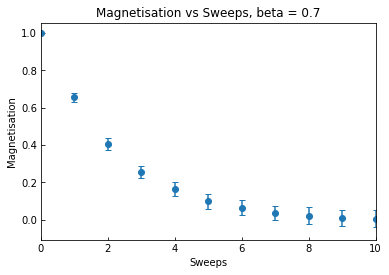

In [243]:
# now need to sort into magnetisation columns

# find number of seeds iterated over
max_seed = 0
for i in range(len(beta_arrays[0.2])):
    if beta_arrays[0.2][i][5] > max_seed:
        max_seed = int(beta_arrays[0.2][i][5]) 

# I don't know why I have to put this in
max_seed += 2

print(f"max seed = {max_seed}")

# magnetisation array for task 1
# columns are: sweeps, magnetisation, error
magnetisation = np.zeros(max_seed), np.zeros(max_seed), np.zeros(max_seed)

# errors
value_squares = np.zeros(max_seed)
value_errors = []

# iterates over every beta = 0.2 value
for i in range(len(beta_arrays[0.2])):
    
    j = int(beta_arrays[0.2][i][0])
    # appends sweeps
    magnetisation[0][j] = beta_arrays[0.2][i][0]
    # appends magnetisation
    magnetisation[1][j] += beta_arrays[0.2][i][2] / 50
    # appends magnetisation squared for error stuff
    value_squares[j] += beta_arrays[0.2][i][2]**2 / 50

prefactor = 1 / ( np.sqrt( max_seed) -1 ) 
for k in range(len(value_squares)):
    value_errors.append( np.sqrt(value_squares[k] - magnetisation[1][k]**2) )
    
# sets intial error to 0 -> magnetisation always starts from +1 or -1
value_errors[0] = 0

plt.errorbar(magnetisation[0], magnetisation[1], yerr=value_errors, fmt='o', capsize=3)

# Set tick parameters inwards
plt.tick_params(axis='both', direction='in')
plt.xlabel('Sweeps')


plt.ylabel('Magnetisation')
plt.title(f'Magnetisation vs Sweeps, beta = {beta}')
plt.show()

    

In [236]:
value_errors

[0,
 0.0036685153636607515,
 0.005211355301308986,
 0.005115616523243961,
 0.005885905071918568,
 0.006644602758711563,
 0.006336235032204481,
 0.00613295484114707,
 0.007521459435818677,
 0.006976406124637365,
 0.007370498827037299,
 0.006889188028535745,
 0.007333890734671985,
 0.006316065657071299,
 0.007275268317070611,
 0.007154389960519149,
 0.007284564412445921,
 0.006767825289165357,
 0.0068175652765199045,
 0.007624889990451205,
 0.008394804665711407,
 0.00779859605574275,
 0.007272925348594791,
 0.007121866629956877,
 0.0073317224516160195,
 0.0066577286995456,
 0.005719311459967443,
 0.0073580014586751815,
 0.007061088849566116,
 0.006905083300221906,
 0.0073348532062078925,
 0.005931682950275574,
 0.0071441034460463515,
 0.007290898033024552,
 0.007238041236993272,
 0.006988752442122788,
 0.0065386163061101855,
 0.007482947153266933,
 0.007210203642963649,
 0.006631572028160469,
 0.005281465794078782,
 0.006103993546740419,
 0.0068618574667607705,
 0.0061953662568617,
 0.00

In [221]:
magnetisation

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 array([ 1.00000e+00,  6.54050e-01,  4.04725e-01,  2.56400e-01,
         1.66025e-01,  1.00100e-01,  6.55750e-02,  3.47000e-02,
         2.24500e-02,  9.40000e-03,  7.22500e-03,  6.65000e-03,
         7.90000e-03,  6.92500e-03,  4.57500e-03,  7.67500e-03,
         2.77500e-03,  9.32500e-03,  2.75000e-03, -3.95000e-03,
         2.52500e-03,  1.80000e-03,  6.60000e-03,  2.82500e-03,
         6.62500e-03,  3.07500e-03, -2.45000e-03,  4.42500e-03,
        -4.25000e-04, -9.20000e-03,  8.80000e-03,  1.30500e-02,
         1.28750e-02,  1.15000e-02,  3.45000e-03,  1.52500e-03,
         7.35000e-03,  4.35000e-03,  7.60000e-03,  9.60000e-03,
         4.40000e-03,  1.47500e-03,  5.15000e-03,  6.72500e-03,
       

In [161]:
len(beta_arrays[0.2])

2550